In [1]:
from sklearn import datasets
digits = datasets.load_digits()

In [3]:
print(digits.data.shape)
print(digits.target.shape)

(1797, 64)
(1797,)


In [10]:
print(digits.data[32])

[ 0.  2. 13. 16. 16. 16. 11.  0.  0.  5. 16. 10.  5.  4.  1.  0.  0.  6.
 16.  7.  3.  0.  0.  0.  0.  9. 16. 16. 16.  6.  0.  0.  0.  3.  8.  4.
 11. 15.  0.  0.  0.  0.  0.  1. 12. 15.  0.  0.  0.  0.  4. 13. 16.  6.
  0.  0.  0.  2. 16. 15.  8.  0.  0.  0.]


#### Escala de 0 (branco) a 1 (preto)

In [11]:
print(digits.images[32])

[[ 0.  2. 13. 16. 16. 16. 11.  0.]
 [ 0.  5. 16. 10.  5.  4.  1.  0.]
 [ 0.  6. 16.  7.  3.  0.  0.  0.]
 [ 0.  9. 16. 16. 16.  6.  0.  0.]
 [ 0.  3.  8.  4. 11. 15.  0.  0.]
 [ 0.  0.  0.  1. 12. 15.  0.  0.]
 [ 0.  0.  4. 13. 16.  6.  0.  0.]
 [ 0.  2. 16. 15.  8.  0.  0.  0.]]


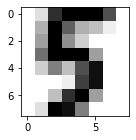

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(2,2))
plt.imshow(digits.images[32], cmap=plt.cm.gray_r)

#### Suport Vector Machine

É um algoritmo de Machine Learning  supervisionado usado para criar limites entre grupos de dados

Elementos: Hyperplane, margin

#### Aplicação do SVM

In [20]:
from sklearn.model_selection import  train_test_split
x = digits.data
y = digits.target
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=5)

#### Previsão categórica ou quantitativa?

In [31]:
from sklearn import svm
from sklearn import metrics
classifier = svm.SVC()
#classifier.fit(x_train, y_train)
classifier.fit(x, y)

# Para testes
#previsoes = classifier.predict(x_test)
#acertos = metrics.accuracy_score(y_test, previsoes)
print(acertos)

0.9777777777777777


Temos que encontrar o melhor modelo estatístico que se enquadre ao nosso conjunto de dados

#### Leitura da Imagem de um dígito

In [40]:
import numpy as np
import matplotlib.image as mpimg
img = mpimg.imread('number2.png')
# print(img)
# Cores  formadas pelo sistema RGB. Valores relacionados: vermelho-verde-azul
def rgb2gray(rgb):
    img_array = np.dot(rgb[...,:3], [0.299, 0.587, 0.114])
    img_array = (16 - img_array * 16).astype(int)
    img_array = img_array.flatten()
    #print(type(img_array.shape))
    return img_array
    

previsao = classifier.predict([rgb2gray(img)])
print(previsao)

[8]


### Teste com regressão logística

In [41]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x, y)
previsao_logreg = logreg.predict([rgb2gray(img)])
print(previsao_logreg)

[8]


C:\Users\Victor\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
